<h2 align="center">Airline Passenger Satisfaction: Identifying Key Factors and Predictive Modeling</h2>

### Abstract:

- In this project, we analyze an airline passenger satisfaction survey dataset to identify factors that are highly correlated with passenger satisfaction or dissatisfaction. And we will predict passenger satisfaction by building a predictive model. 

- The dataset used in this project is the `Airline Passenger Satisfaction` from the [Kaggle](https://www.kaggle.com)

### Learning Agenda of this Notebook
- Basic Understanding the dataset
- Exploratory Data Analysis
- Data Preprocessing 
    - Handling Missing Values
    - Handling Outliers
    - Handling Numerical/Categorical Columns
- Model Building
    - Train/Test Split
    - Model Training
    - Model Building and Feature Selection
    - Predict the Results
- Model Evaluation Technqiues
    - Accuracy
    - Confusion Matrix
    - Classification Metrics
    - ROC VS AUC
- K-Fold Cross Validation
- HyperParameter Tuning
- Prediction on New Data 
- Save /Load Model
- Web Application of the Model

In [4]:
# Import all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import KFold

#### Data-Set Description

- **Gender:** Gender of the passengers (Female, Male)
- **Customer Type:** The customer type (Loyal customer, disloyal customer)
- **Age:** The actual age of the passengers
- **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Flight distance:** The flight distance of this journey
- **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
- **Ease of Online booking:** Satisfaction level of online booking
- **Gate location:** Satisfaction level of Gate location
- **Food and drink:** Satisfaction level of Food and drink
- **Online boarding:** Satisfaction level of online boarding
- **Seat comfort:** Satisfaction level of Seat comfort
- **Inflight entertainment:** Satisfaction level of inflight entertainment
- **On-board service:** Satisfaction level of On-board service
- **Leg room service:** Satisfaction level of Leg room service
- **Baggage handling:** Satisfaction level of baggage handling
- **Check-in service:** Satisfaction level of Check-in service
- **Inflight service:** Satisfaction level of inflight service
- **Cleanliness:** Satisfaction level of Cleanliness
- **Departure Delay in Minutes:** Minutes delayed when departure
- **Arrival Delay in Minutes:** Minutes delayed when Arrival
- **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [70]:
# load the dataset
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [73]:
# Get a snapshot of data
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [71]:
# view dimensions of dataset
train.shape

(103904, 25)

In [72]:
# view summary of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

**Interpretation:**
- Only one column `Arrival Delay in Minutes` has missing values.

**Drop unnecessary columns from both training/testing**

In [74]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)


In [75]:
# snapshot of test data
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**Replace spaces in the column names with underscore in both train & test data**

In [77]:
train.columns =  [col.replace(' ','_') for col in train.columns]
test.columns =  [col.replace(' ','_') for col in test.columns]

**Modify the values of target column in both test/train**

In [78]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

**Checking the nature of data set: balanced or imbalanced?**

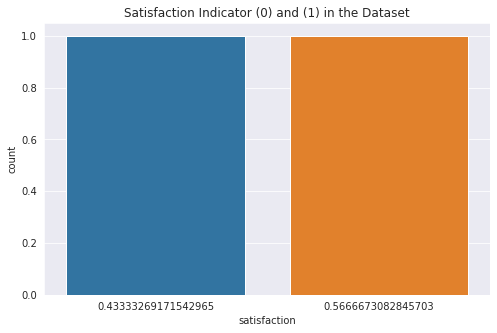

In [85]:
plt.figure(figsize = (8,5))
sns.countplot(x = train.satisfaction.value_counts(normalize=True));
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

**Note:** The above plot shows a distribution of around `56%:43%` between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

#### Handling of Missing Data

In [87]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


**Imputing missing value with mean in both train/test**

In [89]:
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())


**Types of variables/Columns**

Here, we segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

In [92]:
# the categorical columns
cat_columns = [var for var in train.columns if train[var].dtype =='O']
print('There are {} categorical variables\n'.format(len(cat_columns)))
print('The categorical variables are :\n\n', cat_columns)

There are 4 categorical variables

The categorical variables are :

 ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']


In [93]:
# view the categorical columns
train[cat_columns].head(3)

,Gender,Customer_Type,Type_of_Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business


**Replace NaN with mode for categorical variables for both train/test**

In [94]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [95]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

## Label Encoding of Categorical Variables

In [98]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [99]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [100]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [101]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

In [102]:
test.head(3)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0


### Outliers Detection and Removal

In [103]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

**Removing outliers from dataset**

In [104]:
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape


(61197, 23)

## Top 10 Feature Selection through Chi-Square

- The Chi-Square test is a statistical test that measures the independence between two categorical variables. In the context of feature selection, it is used to measure the independence between the feature variables and the target variable. In other words, it is used to determine how well each feature is able to predict the target variable. The Chi-Square test is commonly used in text classification, natural language processing and in feature selection for other machine learning tasks.

- The Chi-Square test calculates the chi-square statistic between each feature and the target variable, and the feature with the highest chi-square value is considered the most informative feature. The Chi-Square test is a non-parametric test that does not assume any distribution for the data, so it is a good option for data with unknown distributions.

- To use the Chi-Square test for feature selection, the SelectKBest class from the scikit-learn library can be used. It selects the k best features from the dataset, where k is the number of features to select, based on the Chi-Square test.

- It's worth noting that the Chi-Square test is sensitive to non-random sampling, so it's important to ensure that the data is representative of the population. Also it's important to note that the Chi-Square test assumes that the variables are independent, so it's not a good option when the features are correlated.

In [105]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [113]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=12)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])



Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness'],
      dtype='object')


> **Note:** These are top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.

### Feature Permutation Importance

In [ ]:
# !pip3 install eli5

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(knn(n_neighbors=5).fit(X,y),random_state=1).fit(X,y)
# eli5.show_weights(perm, feature_names = X.columns.tolist())


## Model Building

In [121]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



In [122]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken


### Model-1: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

Accuracy = 0.8132891900215584
ROC Area under Curve = 0.8201667535234151
Time taken = 0.28580355644226074
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



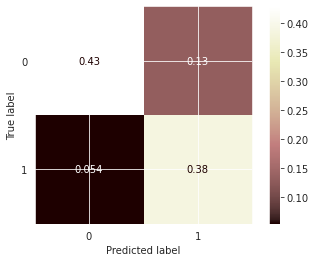

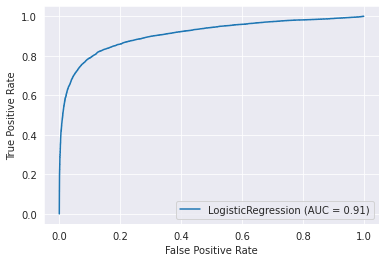

In [123]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


## Model-2: Naive Bayes Classifier

Accuracy = 0.8334616569140745
ROC Area under Curve = 0.8345493488740687
Time taken = 0.04454946517944336
              precision    recall  f1-score   support

           0    0.87081   0.82564   0.84762     14573
           1    0.79102   0.84346   0.81640     11403

    accuracy                        0.83346     25976
   macro avg    0.83092   0.83455   0.83201     25976
weighted avg    0.83578   0.83346   0.83392     25976



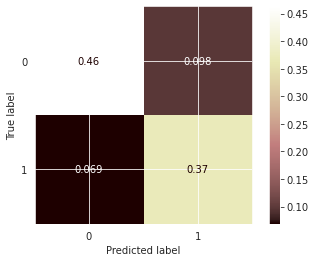

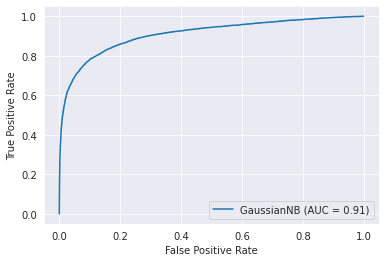

In [124]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

## Model-3: K-Nearest Neighbor Classifier

Accuracy = 0.8861256544502618
ROC Area under Curve = 0.8870270908506304
Time taken = 4.0518639087677
              precision    recall  f1-score   support

           0    0.91414   0.87964   0.89656     14573
           1    0.85326   0.89441   0.87335     11403

    accuracy                        0.88613     25976
   macro avg    0.88370   0.88703   0.88496     25976
weighted avg    0.88741   0.88613   0.88637     25976



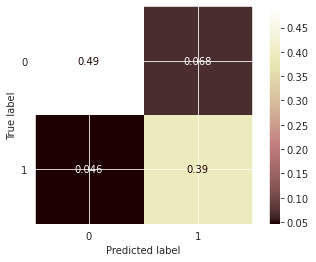

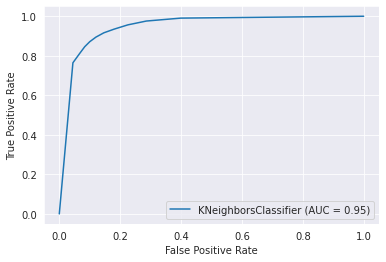

In [125]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)


## Decision Region Plotting for Different Models

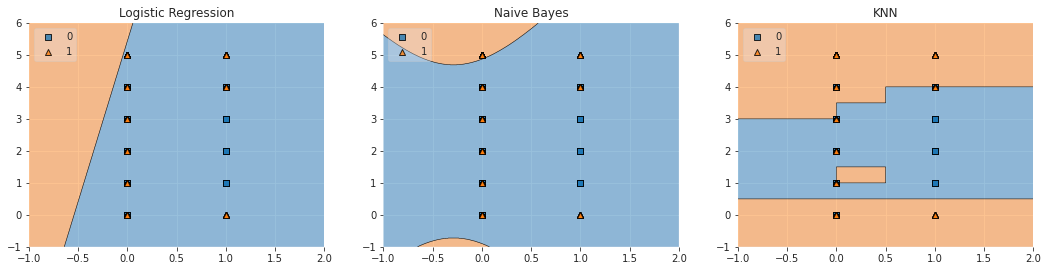

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()


X_list = train[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))


labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN']

for clf, lab, grd in zip([clf1, clf2, clf3],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

### Model Comparison:

We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution

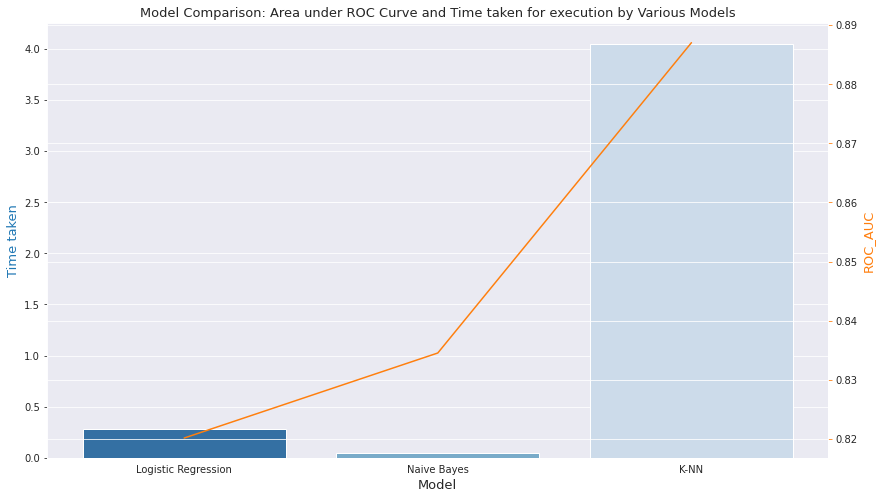

In [129]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn]
tt = [tt_lr, tt_nb, tt_kn]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


### Exploratory Data Analysis
#### Uni-variate Analysis
Plot `count-plot` for all the categorical columns


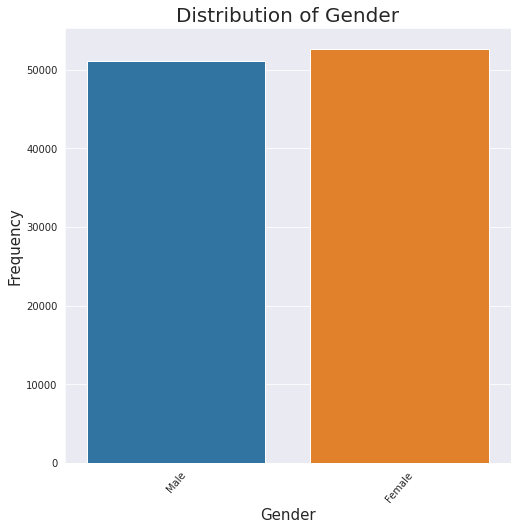

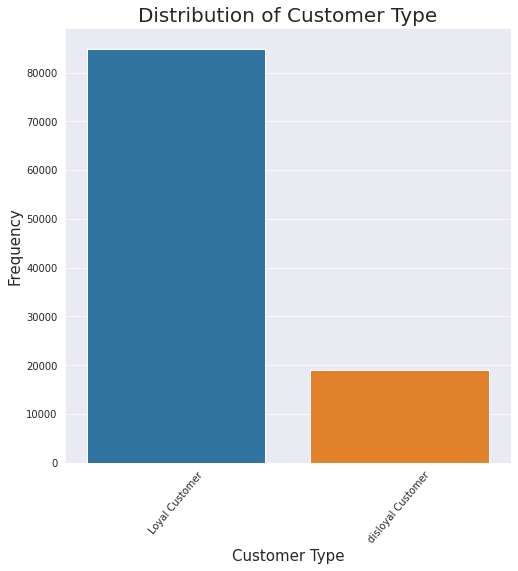

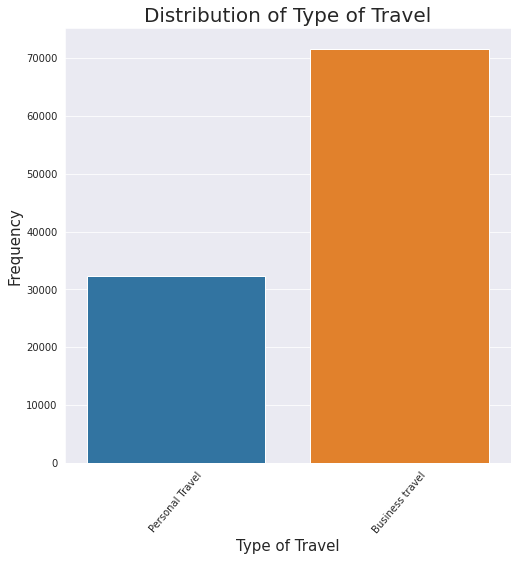

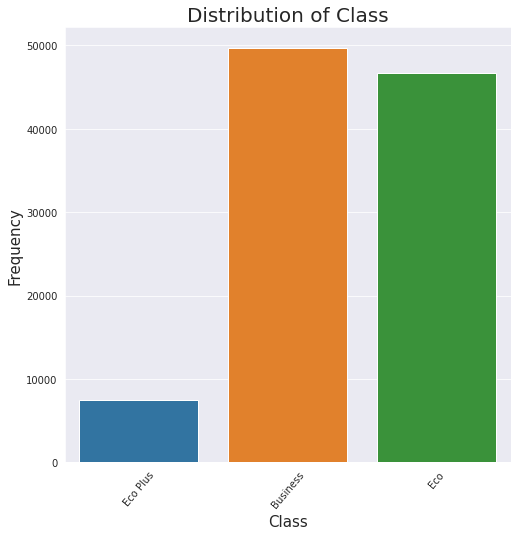

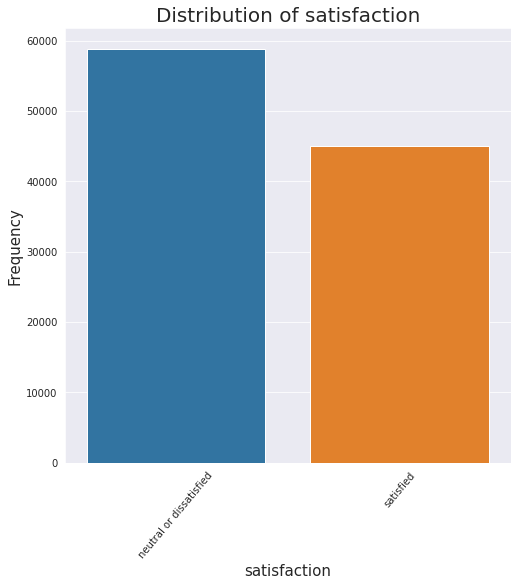

In [24]:
sns.set_style('darkgrid')
for col in cat_columns:
#     print(col)
    plt.figure(figsize=(8,8))
    sns.countplot(x=col, data=train)
    plt.title(f"Distribution of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(rotation=50)
    plt.show()

Plot `histogram` for all the Numerical Columns

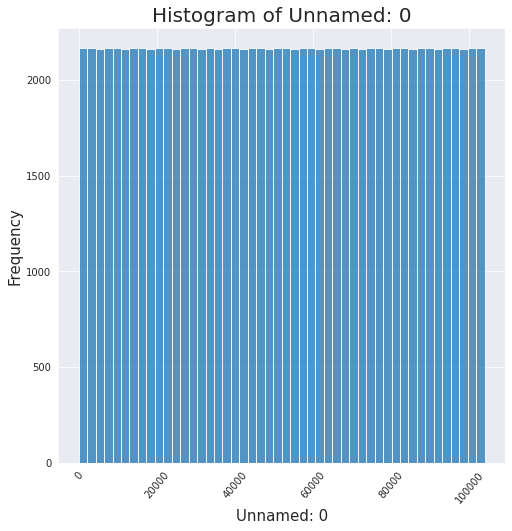

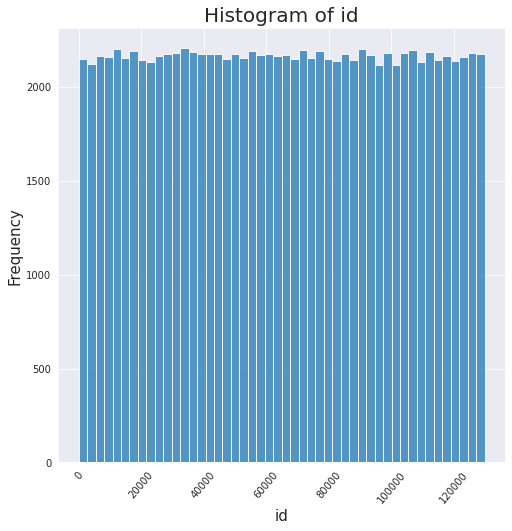

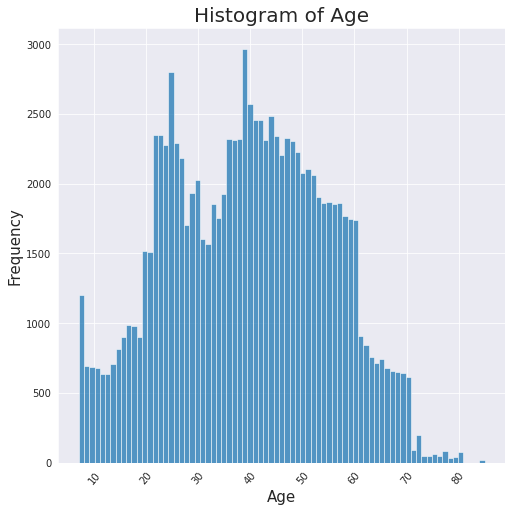

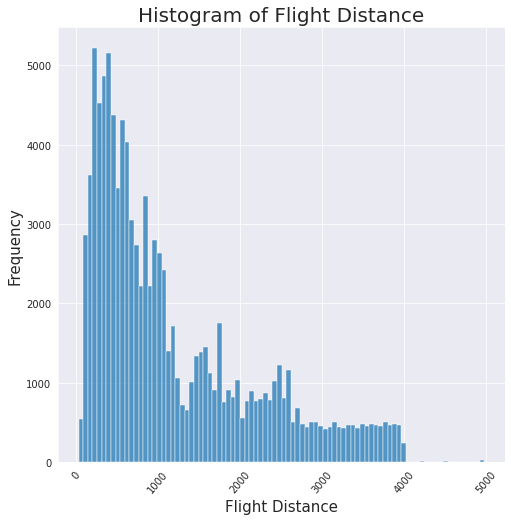

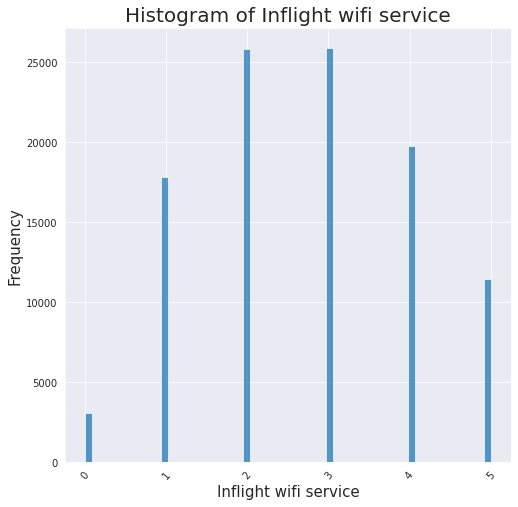

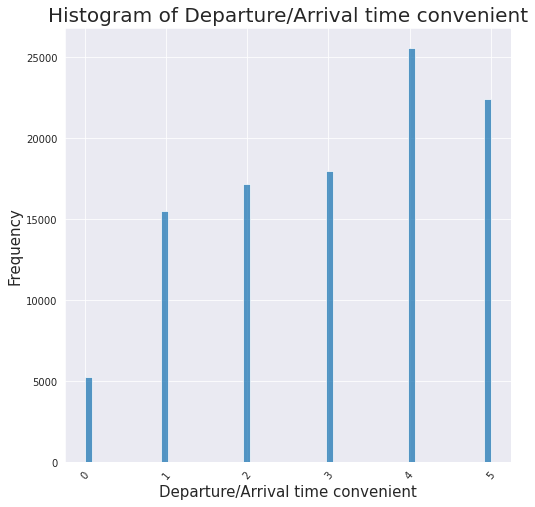

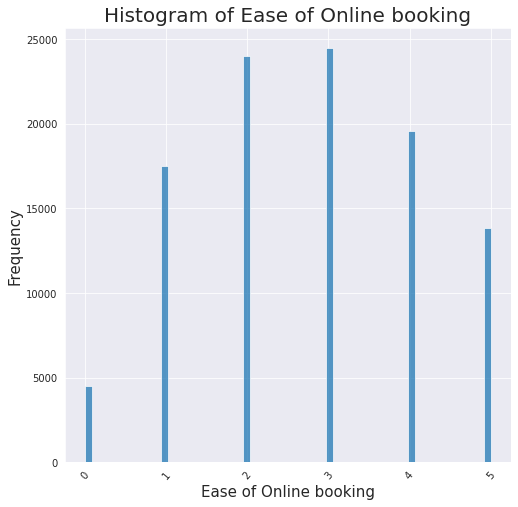

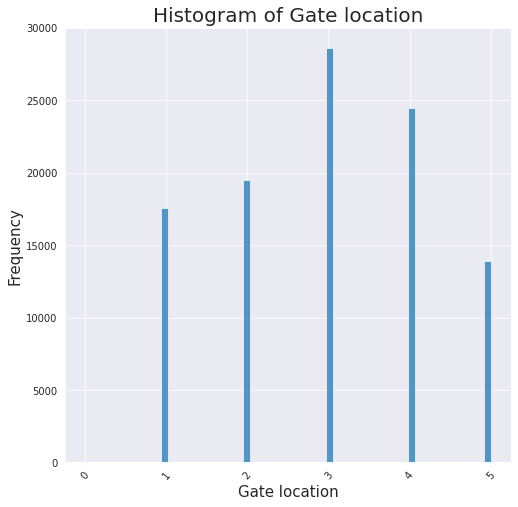

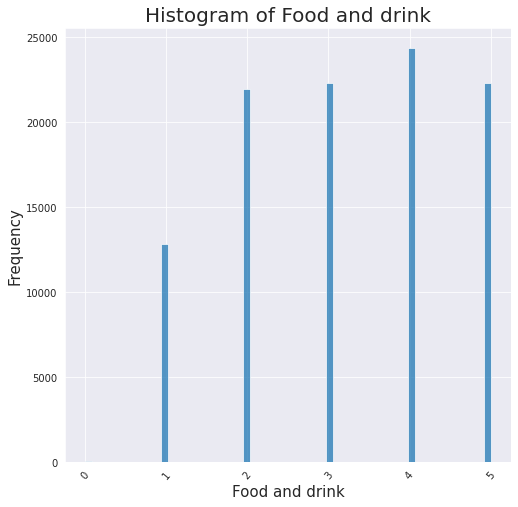

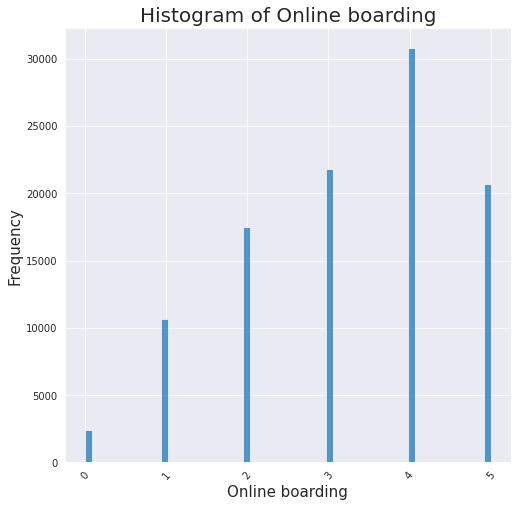

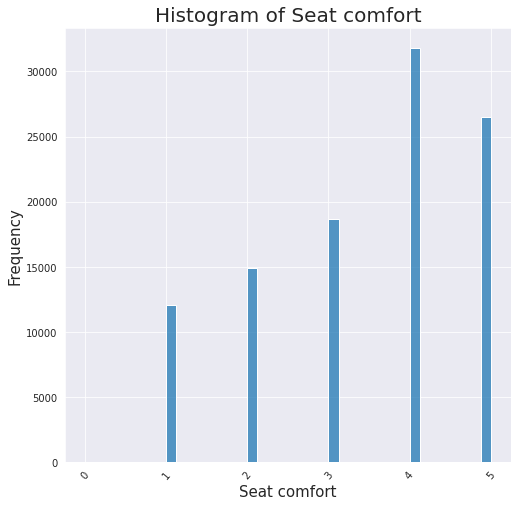

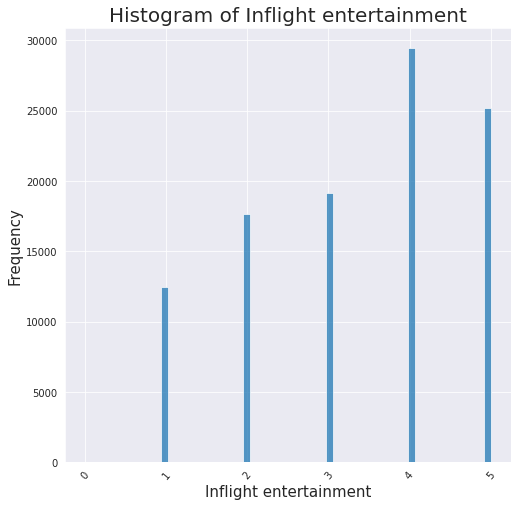

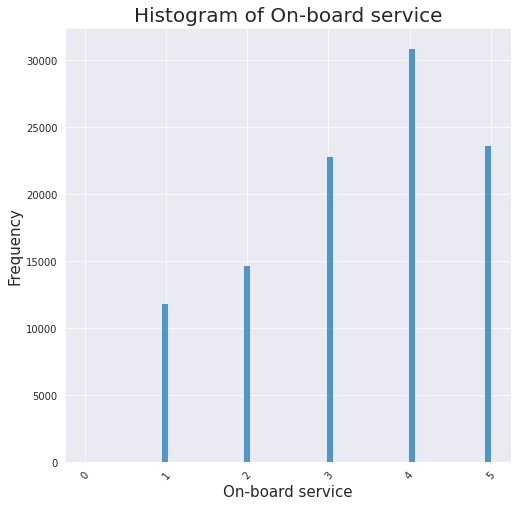

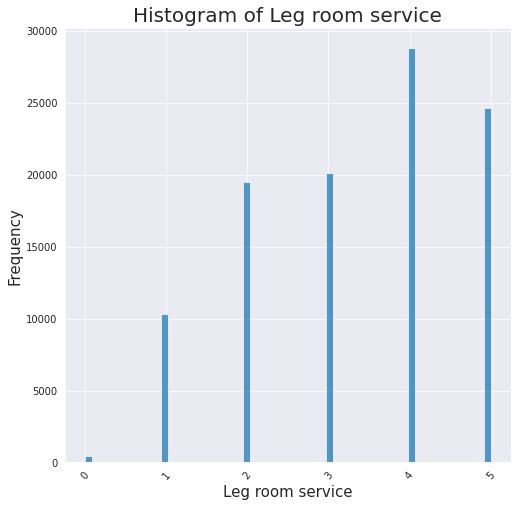

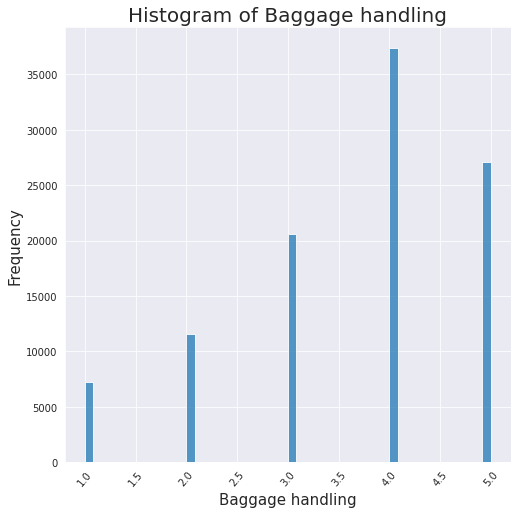

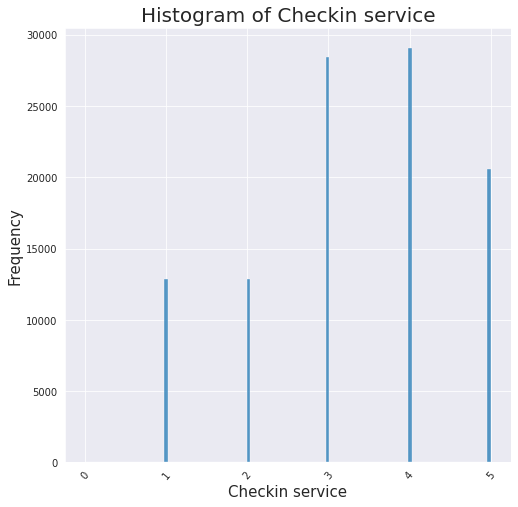

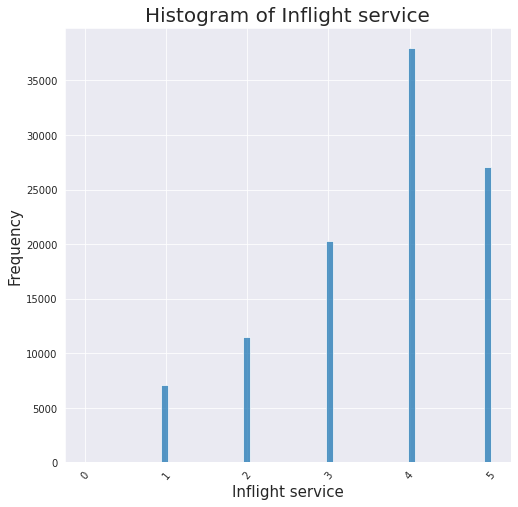

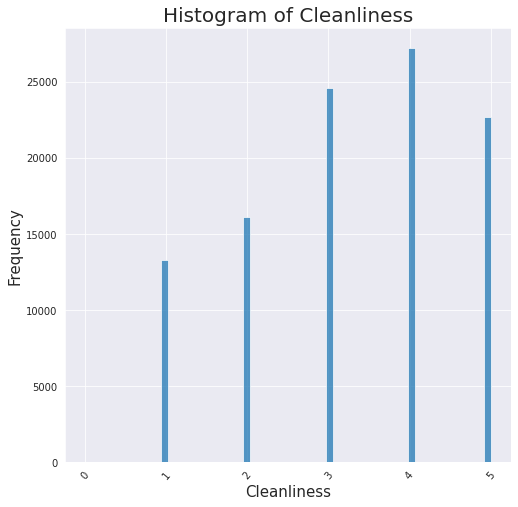

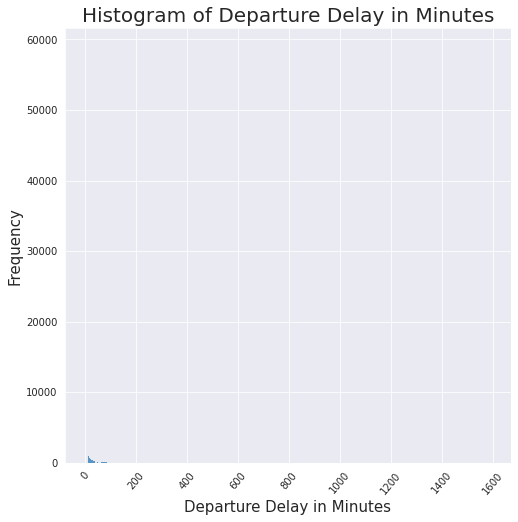

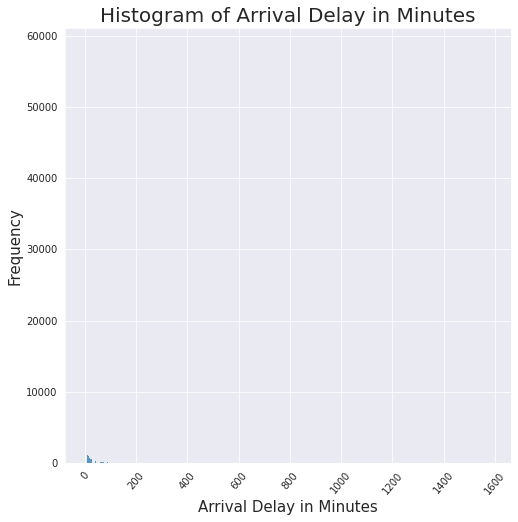

In [27]:
sns.set_style('darkgrid')
for col in num_cols:
#     print(col)
    plt.figure(figsize=(8,8))
    sns.histplot(train[col])
    plt.title(f"Histogram of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(rotation=50)
    plt.show()

Plot `boxplot` for all the Numerical Columns

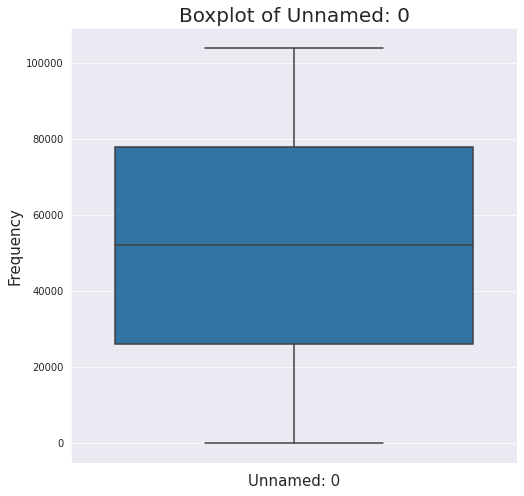

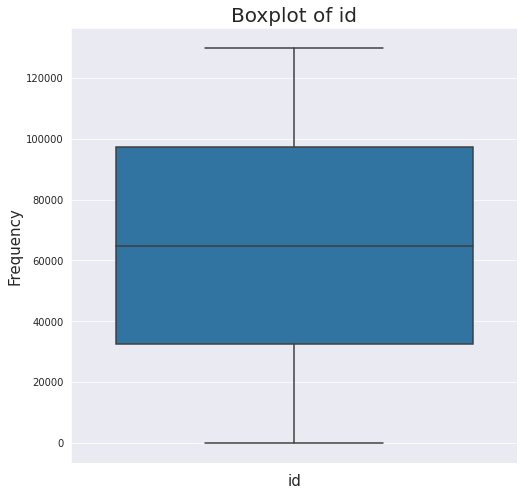

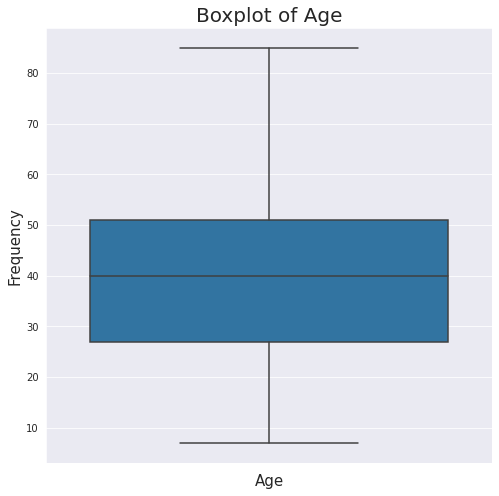

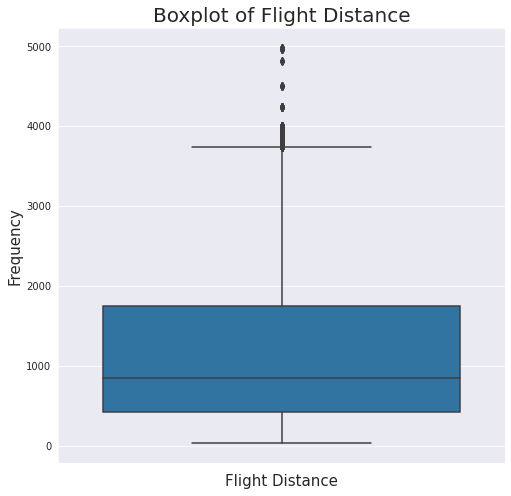

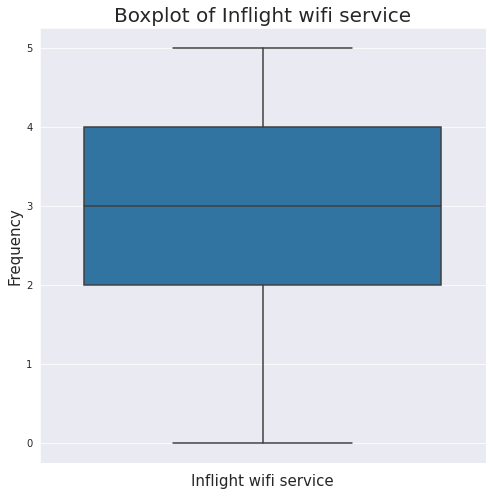

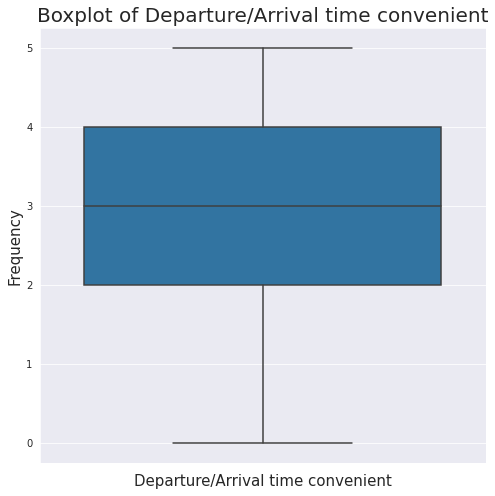

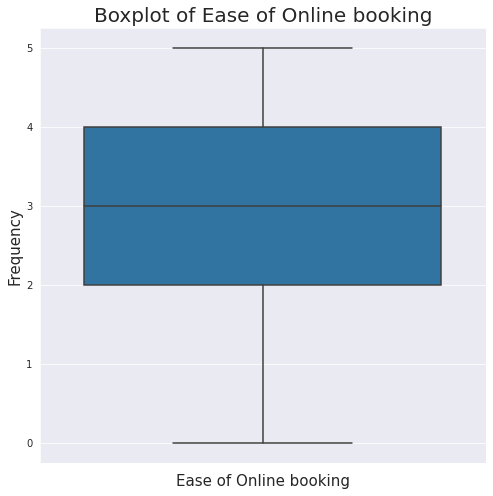

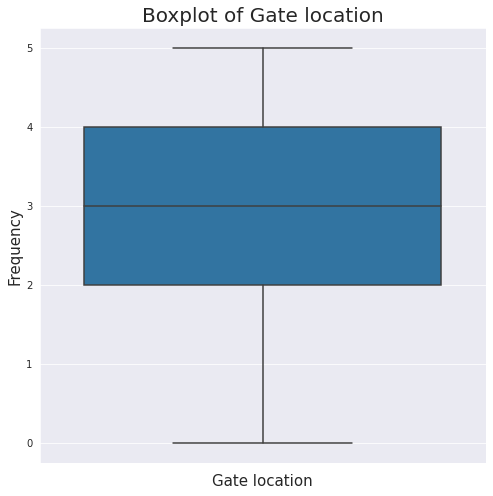

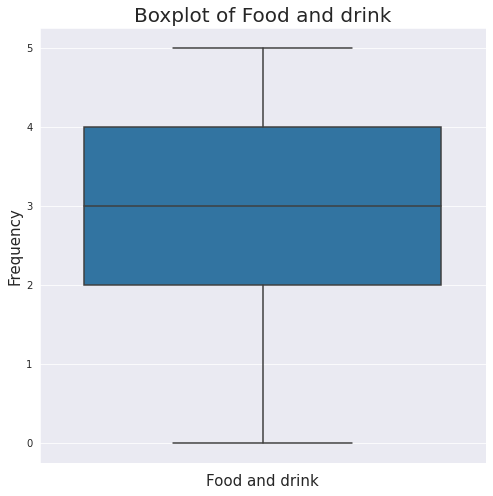

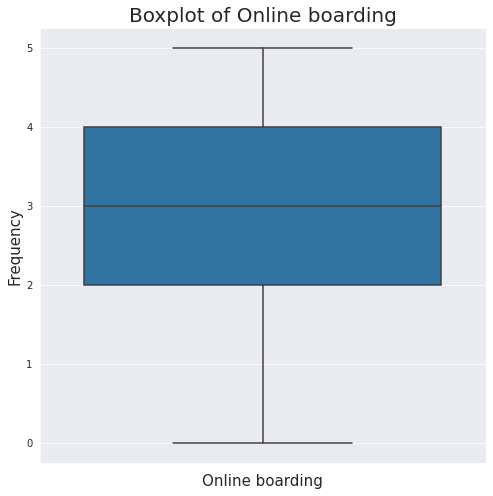

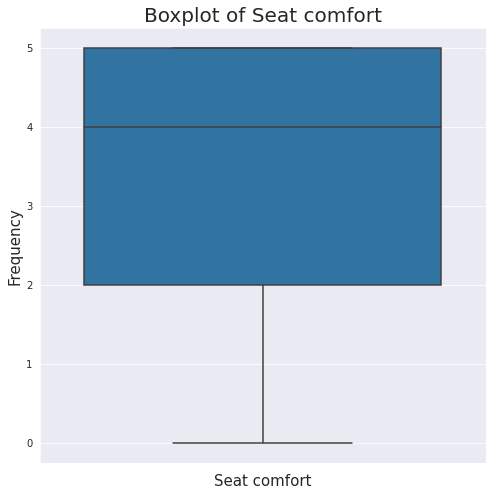

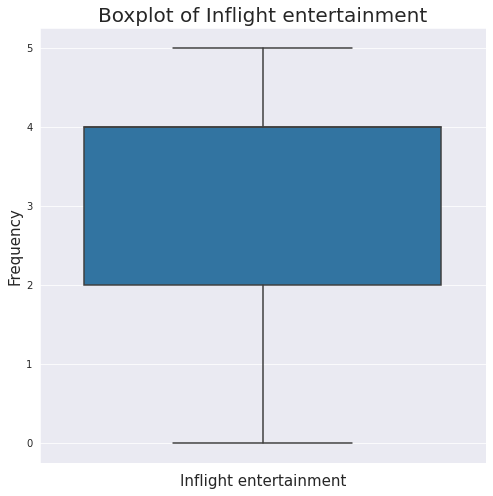

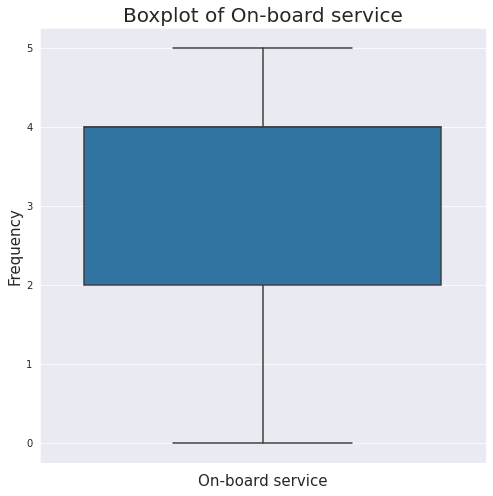

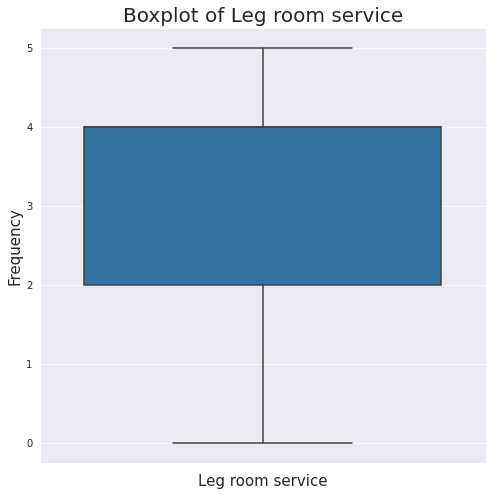

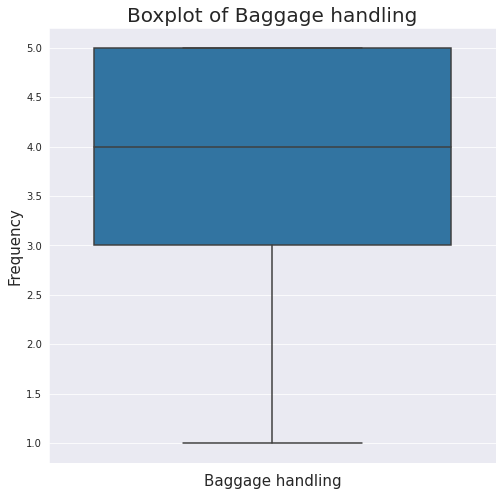

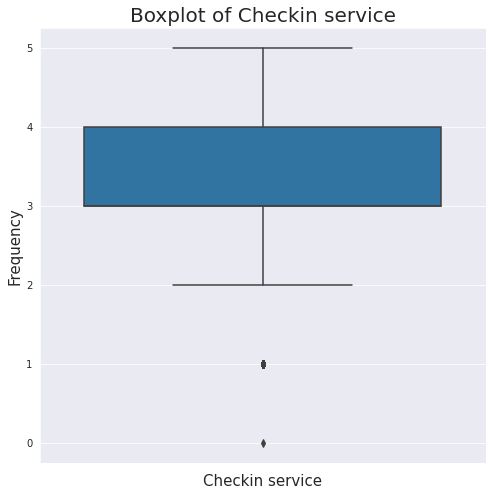

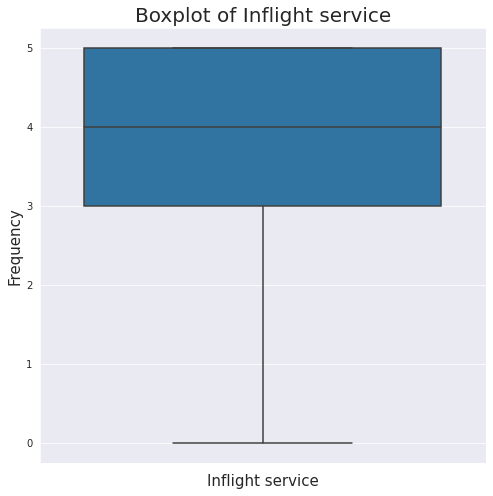

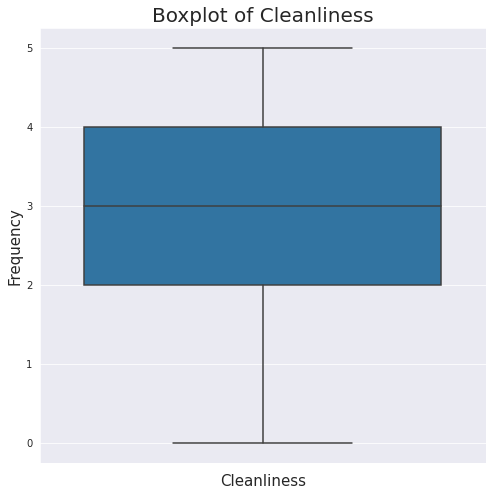

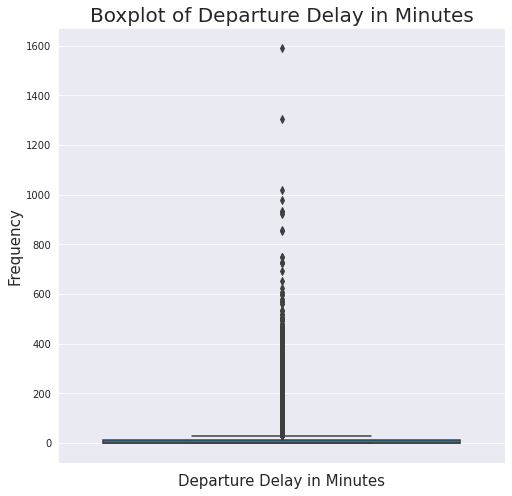

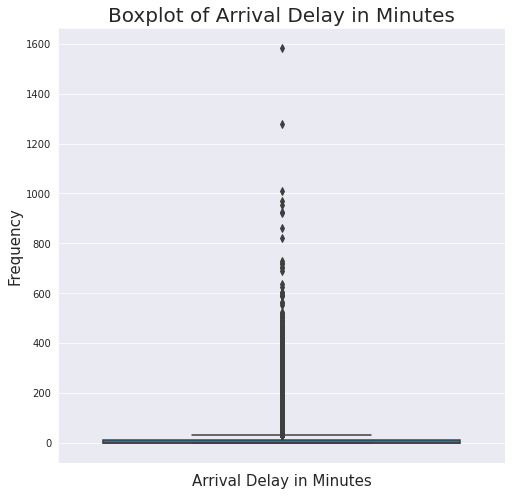

In [28]:
sns.set_style('darkgrid')
for col in num_cols:
#     print(col)
    plt.figure(figsize=(8,8))
    sns.boxplot(y = train[col])
    plt.title(f"Boxplot of {col}", fontsize=20)
    plt.xlabel(f"{col}", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.xticks(rotation=50)
    plt.show()


Plot a `heatmap` for numerical-categorical colummns

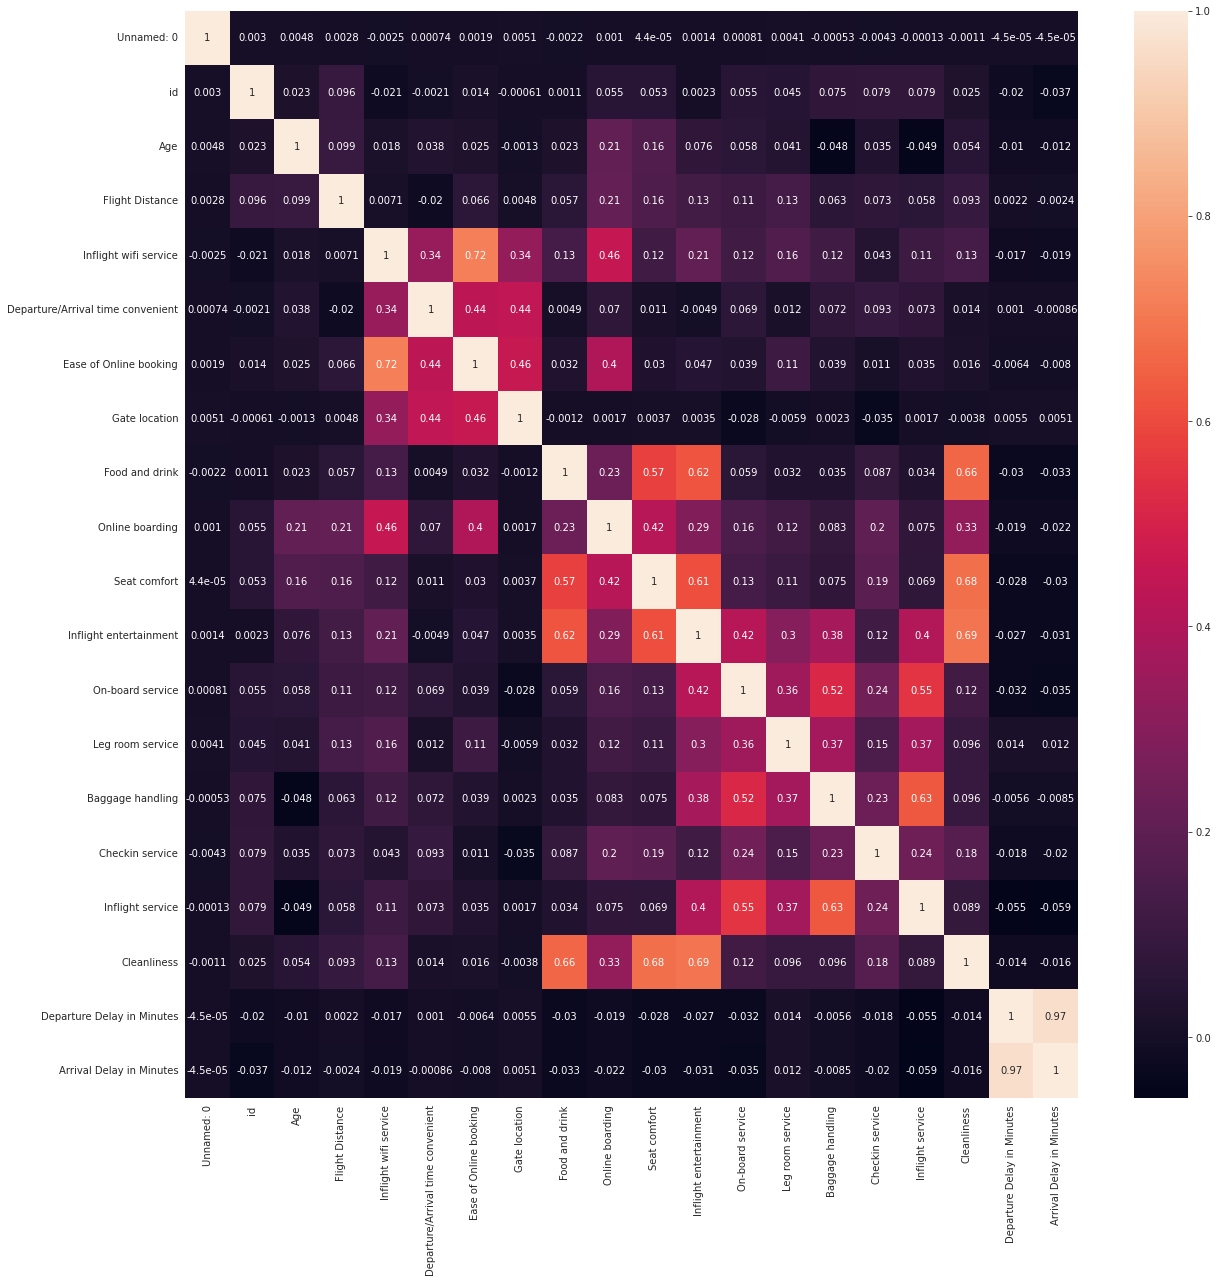

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True);

### Prediction on New Data

In [177]:
new_data = pd.DataFrame({
    'Type_of_Travel':'Business travel',
    'Inflight_wifi_service':3,
    'Online_boarding':2,
    'Seat_comfort':3,
    'Flight_Distance':1200,
    'Inflight_entertainment': 4, 
    'On_board_service':1,
    'Leg_room_service':3,
    'Cleanliness':2,
    'Checkin_service':4,
    'Inflight_service':3,
    'Baggage_handling':4
},index=[0])

numerical_features = new_data.select_dtypes(include=np.number).columns.to_list()
categorical_features = new_data.select_dtypes(exclude=np.number).columns.to_list()


numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

new_data = preprocessor.fit_transform(new_data)
result = model_kn.predict(new_data)
if result[0] == 1:
    print("Passenger is Satisfied")
else:
    print("Passenger is Satisfied")


Passenger is Satisfied


### Save the Model

In [167]:
import pickle
# Save the model to a file using pickle
with open("passenger_satisfaction.pkl", 'wb') as file:
    pickle.dump(model_kn, file)

## Load the Model

In [168]:
import pickle

# Load the model to a file using pickle
with open("passenger_satisfaction.pkl", 'rb') as file:
    model_file = pickle.load(file)


### Prediction on New Data

In [176]:
new_data = pd.DataFrame({
    'Type_of_Travel':'Personal travel',
    'Inflight_wifi_service':2,
    'Online_boarding':1,
    'Seat_comfort':1,
    'Flight_Distance':2200,
    'Inflight_entertainment': 2, 
    'On_board_service':1,
    'Leg_room_service':2,
    'Cleanliness':1,
    'Checkin_service':2,
    'Inflight_service':2,
    'Baggage_handling':1,
},index=[0])

numerical_features = new_data.select_dtypes(include=np.number).columns.to_list()
categorical_features = new_data.select_dtypes(exclude=np.number).columns.to_list()


numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

new_data = preprocessor.fit_transform(new_data)
result = model_file.predict(new_data)
if result[0] == 1:
    print("Passenger is Satisfied")
else:
    print("Passenger is Satisfied")


Passenger is Satisfied
